In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import data
df = pd.read_csv('wine_quality.csv')
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [3]:
# Define features and y values
y = df['quality']
features = df.drop(columns=['quality'])

In [5]:
## 1. Data transformation
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit(features).transform(features)

In [9]:
## 2. Train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=99, test_size=0.2)

In [12]:
## 3. Fit a logistic regression classifier without regularization
from sklearn.linear_model import LogisticRegression

clf_no_reg = LogisticRegression(penalty=None)
clf_no_reg.fit(X_train, y_train)

LogisticRegression(penalty=None)

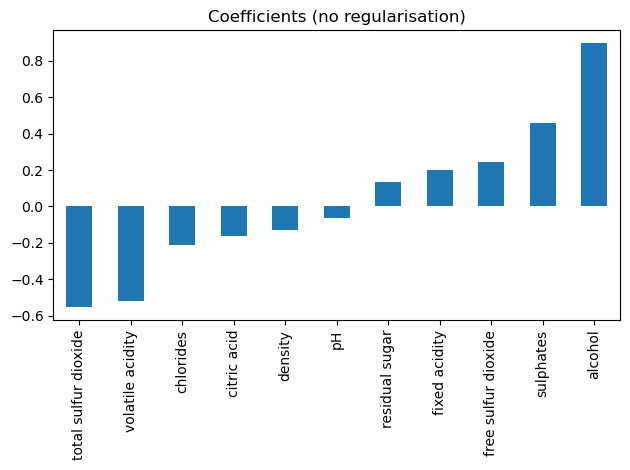

In [13]:
## 4. Plot the coefficients
predictors = features.columns
coefficients = clf_no_reg.coef_.ravel()
coef = pd.Series(coefficients, predictors).sort_values()
coef.plot(kind='bar', title='Coefficients (no regularisation)')
plt.tight_layout()
plt.show()

In [15]:
## 5. Training and test performance
from sklearn.metrics import f1_score

y_pred_test = clf_no_reg.predict(X_test)
y_pred_train = clf_no_reg.predict(X_train)
print('Training Score: ', f1_score(y_train, y_pred_train))
print('Testing Score: ', f1_score(y_test, y_pred_test))

Training Score:  0.7727598566308242
Testing Score:  0.7266666666666667


In [16]:
## 6. Default Implementation (L2-regularized!)
clf_default = LogisticRegression()
clf_default.fit(X_train, y_train)

LogisticRegression()

In [18]:
## 7. Ridge Scores
y_pred_test_l2 = clf_default.predict(X_test)
y_pred_train_l2 = clf_default.predict(X_train)
print('Training Score: ', f1_score(y_train, y_pred_train_l2))
print('Testing Score: ', f1_score(y_test, y_pred_test_l2))

Training Score:  0.7727598566308242
Testing Score:  0.7266666666666667


In [25]:
## 8. Coarse-grained hyperparameter tuning for training and test data
C_array = [0.0001, 0.001, 0.01, 0.1, 1]
training_array = []
test_array = []

for x in C_array:
    clf = LogisticRegression(C=x)
    clf.fit(X_train, y_train)
    y_pred_test = clf.predict(X_test)
    y_pred_train = clf.predict(X_train)
    training_array.append(f1_score(y_train, y_pred_train))
    test_array.append(f1_score(y_test, y_pred_test))

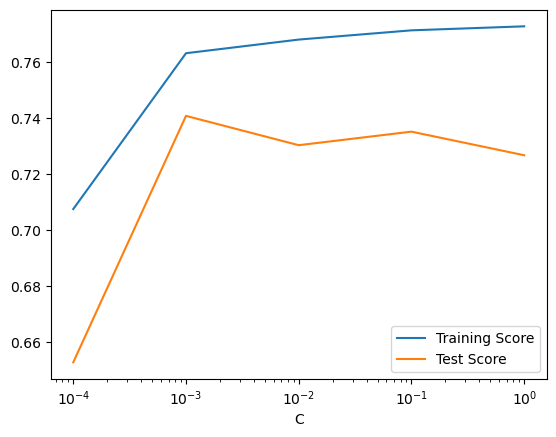

In [27]:
## 9. Plot training and test scores as a function of C
plt.plot(C_array, training_array, label = 'Training Score')
plt.plot(C_array, test_array, label = 'Test Score')
plt.xscale('log')
plt.xlabel('C')
plt.legend()
plt.show()

In [29]:
## 10. Making a parameter grid for GridSearchCV
C_array = np.logspace(-4, -2, 100)

# Making a dict to enter as an input to param_grid
tuning_C = {'C': C_array}

In [30]:
## 11. Implementing GridSearchCV with l2 penalty
from sklearn.model_selection import GridSearchCV

clf_gs = LogisticRegression()
gs = GridSearchCV(estimator=clf_gs, param_grid=tuning_C, scoring='f1',
                  cv = 5)
gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([0.0001    , 0.00010476, 0.00010975, 0.00011498, 0.00012045,
       0.00012619, 0.00013219, 0.00013849, 0.00014508, 0.00015199,
       0.00015923, 0.00016681, 0.00017475, 0.00018307, 0.00019179,
       0.00020092, 0.00021049, 0.00022051, 0.00023101, 0.00024201,
       0.00025354, 0.00026561, 0.00027826, 0.00029151, 0.00030539,
       0.00031...
       0.00205651, 0.00215443, 0.00225702, 0.00236449, 0.00247708,
       0.00259502, 0.00271859, 0.00284804, 0.00298365, 0.00312572,
       0.00327455, 0.00343047, 0.00359381, 0.00376494, 0.00394421,
       0.00413201, 0.00432876, 0.00453488, 0.00475081, 0.00497702,
       0.00521401, 0.00546228, 0.00572237, 0.00599484, 0.00628029,
       0.00657933, 0.00689261, 0.00722081, 0.00756463, 0.00792483,
       0.00830218, 0.00869749, 0.00911163, 0.00954548, 0.01      ])},
             scoring='f1')

In [31]:
## 12. Optimal C value and the score corresponding to it
print('Best C value: ', gs.best_params_)
print('Best Score: ', gs.best_score_)

Best C value:  {'C': 0.0019630406500402726}
Best Score:  0.7723336222647887


In [32]:
## 13. Validating the "best classifier"
clf_best_ridge = LogisticRegression(C=gs.best_params_['C'])
clf_best_ridge.fit(X_train, y_train)
y_pred_best = clf_best_ridge.predict(X_test)
print(f1_score(y_test, y_pred_best))

0.7407407407407408


In [33]:
## 14. Implement L1 hyperparameter tuning with LogisticRegressionCV
from sklearn.linear_model import LogisticRegressionCV

clf_l1 = LogisticRegressionCV(Cs=np.logspace(-2, 2, 100),
                              cv=5,
                              penalty='l1',
                              solver='liblinear',
                              scoring='f1')
clf_l1.fit(X, y)

LogisticRegressionCV(Cs=array([1.00000000e-02, 1.09749877e-02, 1.20450354e-02, 1.32194115e-02,
       1.45082878e-02, 1.59228279e-02, 1.74752840e-02, 1.91791026e-02,
       2.10490414e-02, 2.31012970e-02, 2.53536449e-02, 2.78255940e-02,
       3.05385551e-02, 3.35160265e-02, 3.67837977e-02, 4.03701726e-02,
       4.43062146e-02, 4.86260158e-02, 5.33669923e-02, 5.85702082e-02,
       6.42807312e-02, 7.05...
       1.70735265e+01, 1.87381742e+01, 2.05651231e+01, 2.25701972e+01,
       2.47707636e+01, 2.71858824e+01, 2.98364724e+01, 3.27454916e+01,
       3.59381366e+01, 3.94420606e+01, 4.32876128e+01, 4.75081016e+01,
       5.21400829e+01, 5.72236766e+01, 6.28029144e+01, 6.89261210e+01,
       7.56463328e+01, 8.30217568e+01, 9.11162756e+01, 1.00000000e+02]),
                     cv=5, penalty='l1', scoring='f1', solver='liblinear')

In [34]:
## 15. Optimal C value and corresponding coefficients
print('Best C value: ', clf_l1.C_)
print('Best fit coefficients: ', clf_l1.coef_)

Best C value:  [0.25950242]
Best fit coefficients:  [[ 0.11645476 -0.5563678  -0.17266132  0.03124068 -0.17326882  0.20053267
  -0.50580643  0.         -0.07044392  0.43223745  0.94102994]]


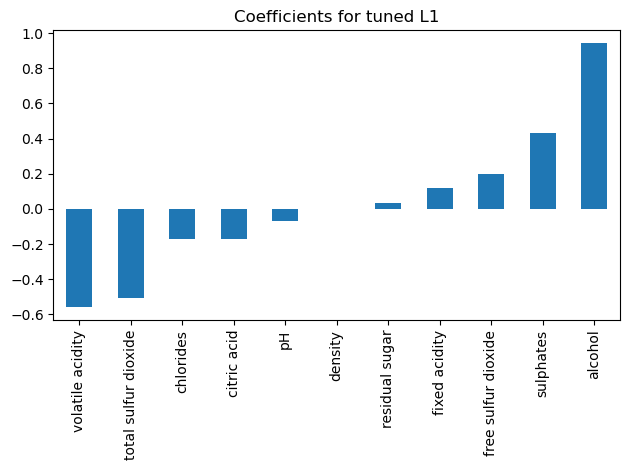

In [35]:
## 16. Plotting the tuned L1 coefficients
coefficients = clf_l1.coef_.ravel()
coef = pd.Series(coefficients, predictors).sort_values()

coef.plot(kind='bar', title='Coefficients for tuned L1')
plt.tight_layout()
plt.show()